In [88]:
import pymongo 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [81]:
# Connecting to MongoDB 
client = pymongo.MongoClient("mongodb://localhost:27017")
db = client["final_project"]
collection = db["keyword_tweets"]

In [82]:
# TEST: Defining and executing a query to obtain all dates and tweets
query = {}
projection = {'tweet': 1, 'date': 1, '_id': 0}
tweets = collection.find(query, projection)

In [95]:
def find_count_expensive(word, year):
    # Define the pipeline to filter tweets containing the word 'expensive' and the given year
    pipeline = [
        {"$match": {
                "tweet": {"$regex": "expensive|not cheap", "$options": "i"},
                "date": {"$regex": f"{year}"}}},
        {"$project": {
                "_id": 0,
                "tweet": 1,
                "count": {
                    "$size": {
                        "$regexFindAll": {
                            "input": "$tweet",
                            "regex": word,
                            "options": "i"}}}}},
        {"$match": {"count": {"$gt": 0}}}]

    # Execute the aggregation pipeline and print the results
    result = collection.aggregate(pipeline)
    count = sum([doc['count'] for doc in result])
    return word, count


In [76]:
def find_count_cheap(word):
    # Define the pipeline to filter tweets containing the word 'cheap'
    pipeline = [
        {"$match": {
                "tweet": {"$regex": "cheap", "$options": "i"}}},
        {"$project": {
                "_id": 0,
                "tweet": 1,
                "count": {
                    "$size": {
                        "$regexFindAll": {
                            "input": "$tweet",
                            "regex": word,
                            "options": "i"}}}}},
        {"$match": {"count": {"$gt": 0}}}]

    # Execute the aggregation pipeline and print the results
    result = collection.aggregate(pipeline)
    count = sum([doc['count'] for doc in result])
    return word,count

In [186]:
# define list of words to check counts of...
word_lst = ["gas", "healthcare", "alcohol", "housing", "clothing", "insulin", "living", "coffee", "tickets", "groceries", "rent", "education", "food", "clothes"]
counts_2010 = {}
for word in word_lst:
    word, count = find_count_expensive(word, 10)
    counts_2010[word] = count 

counts_2022 = {}
for word in word_lst:
    word, count = find_count_expensive(word, 22)
    counts_2022[word] = count 

total_count_2010 = {}

for word, count in counts_2010.items():
    percent = round(count / sum(counts_2010.values()) * 100, 2)
    total_count_2010[word] = percent
    
    
total_count_2022 = {}

for word, count in counts_2022.items():
    percent = round(count / sum(counts_2022.values()) * 100, 2)
    total_count_2022[word] = percent
print(total_count_2010)
print(total_count_2022)

{'gas': 14.81, 'healthcare': 6.17, 'alcohol': 4.94, 'housing': 2.47, 'clothing': 4.94, 'insulin': 0.0, 'living': 3.7, 'coffee': 2.47, 'tickets': 12.35, 'groceries': 2.47, 'rent': 18.52, 'education': 7.41, 'food': 12.35, 'clothes': 7.41}
{'gas': 18.18, 'healthcare': 2.27, 'alcohol': 2.27, 'housing': 7.58, 'clothing': 1.52, 'insulin': 0.76, 'living': 3.79, 'coffee': 3.79, 'tickets': 7.58, 'groceries': 2.27, 'rent': 21.97, 'education': 3.03, 'food': 20.45, 'clothes': 4.55}


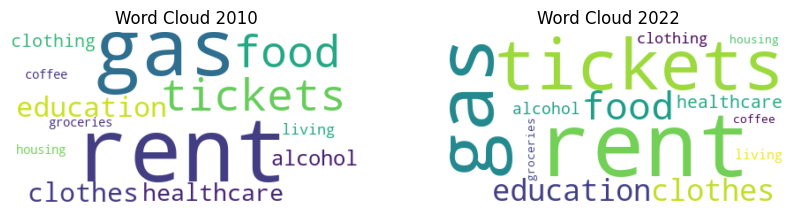

In [187]:
plt.figure(figsize=(10,5))

# create WordCloud object for 2010
wordcloud_2010 = WordCloud(max_font_size=100, background_color="white").generate_from_frequencies(total_count_2010)
plt.subplot(1,2,1)

# plot WordCloud for 2010
plt.imshow(wordcloud_2010, interpolation='bilinear')
plt.title('Word Cloud 2010')
plt.axis("off")


# create WordCloud object for 2022
wordcloud_2022 = WordCloud(max_font_size=100, background_color="white").generate_from_frequencies(total_count_2010)
plt.subplot(1,2,2)

# plot WordCloud for 2022
plt.imshow(wordcloud_2022, interpolation='bilinear')
plt.title('Word Cloud 2022')
plt.axis("off")

plt.show()

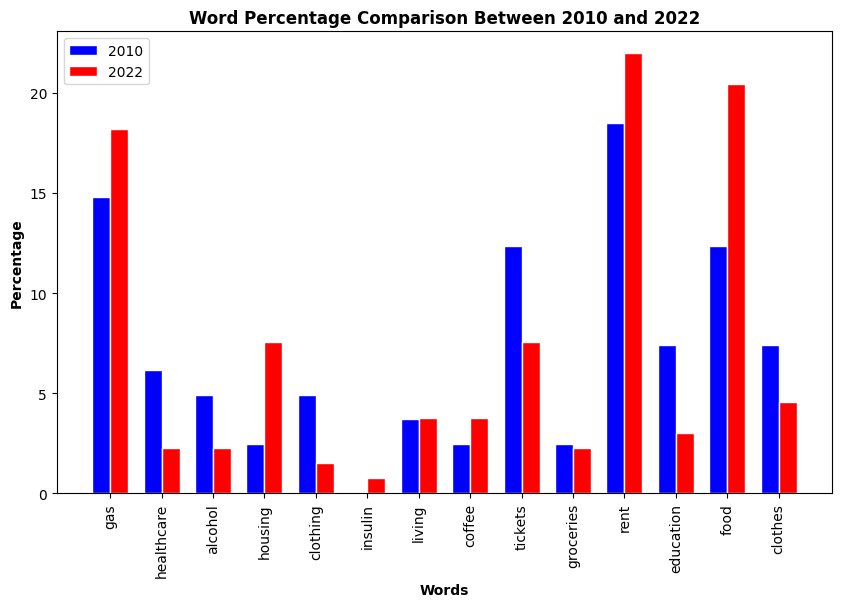

In [188]:
# Create two lists to store the words and their corresponding percentages
words = list(total_count_2010.keys())
percentages_2010 = list(total_count_2010.values())
percentages_2022 = list(total_count_2022.values())
fig, ax = plt.subplots(figsize=(10,6))

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = range(len(words))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.bar(r1, percentages_2010, color='blue', width=bar_width, edgecolor='white', label='2010')
plt.bar(r2, percentages_2022, color='red', width=bar_width, edgecolor='white', label='2022')

# Add xticks on the middle of the group bars
plt.xlabel('Words', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(words))], words)

# Add ylabel and title
plt.ylabel('Percentage', fontweight='bold')
plt.title('Word Percentage Comparison Between 2010 and 2022', fontweight='bold')
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show the plot
plt.show()